In [1]:
from random import random
from math import floor, log

In [2]:
def bernoulli(p):
  return 1 if random()<p else 0

In [3]:
def binomial(n,p):
  return sum(bernoulli(p) for _ in range(n))

In [4]:
def uniform(n):
  if type(n)==int:
    return floor(n*random())
  if type(n)==list:
    return n[uniform(len(n))]

In [5]:
def geometric(p):
  n=1
  while(bernoulli(p)==0):
    n+=1
  return n

In [6]:
geometric(.1)

39

In [7]:
def geometric(p):
  return floor(log(1-random())/log(1-p))+1

In [8]:
N=1000000
sum([geometric(.1) for _ in range(N)])/N

10.001596

In [9]:
def fini(proba):
  r=random()
  s=sum(proba)
  sp=0
  n=0
  for p in proba:
    if r>=sp:
      n+=1
    else:
      break
    sp+=p/s
  return n-1

In [10]:
[fini([10,1,1,10]) for _ in range(20)]

[0, 2, 0, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 0, 0]

In [11]:
def infini(proba):
    r=random()
    n=0
    s=proba(0)
    while r>=s:
        n+=1
        s+=proba(n)
    return n

In [12]:
p=.1
sum([infini(lambda n: 0 if n==0 else (1-p)**(n-1)*p) for _ in range(20)])/20

10.1

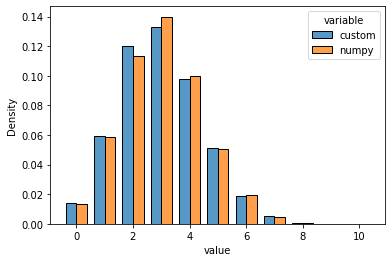

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np

N=10000
n=10
p=.3
df = pd.DataFrame({
    "custom": np.array([binomial(n,p) for _ in range(N)]),
    "numpy": np.random.binomial(n,p,N)
})
sns.histplot(df.melt(),
        x='value', hue='variable', y='frequency',
        multiple='dodge',
        shrink=.75,
        bins=np.arange(-0.5, n+1.5, 1.),
        stat='density');